In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
y= np.array(['chat', 'chien', 'chat', 'oiseau'])

In [4]:
transformer= LabelEncoder()
transformer.fit(y)  # il faut que l'entree soit un array with 1 dim

LabelEncoder()

In [5]:
transformer.classes_

array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [6]:
transformer.transform(y)

array([0, 1, 0, 2])

In [7]:
transformer.fit_transform(y)

array([0, 1, 0, 2])

In [8]:
#================== transformation inverse ==============
transformer.inverse_transform(np.array([0,1,2,0,1]))

array(['chat', 'chien', 'oiseau', 'chat', 'chien'], dtype='<U6')

In [1]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
#============== OrdinalEncoder ===============

X= np.array([['chat', 'Polis'],
             ['chien', 'Polis'],
             ['chat', 'Polis'],
             ['oiseau', 'Plumes']])

In [10]:
encoder= OrdinalEncoder()
X_trasnf= encoder.fit_transform(X)
print(X_trasnf)

[[0. 1.]
 [1. 1.]
 [0. 1.]
 [2. 0.]]


In [11]:
encoder.inverse_transform(X_trasnf)

array([['chat', 'Polis'],
       ['chien', 'Polis'],
       ['chat', 'Polis'],
       ['oiseau', 'Plumes']], dtype='<U6')

In [12]:
#============= Encodage One-hot =========================

from sklearn.preprocessing import LabelBinarizer

In [16]:
y= np.array(['chien', 'chat', 'chat', 'oiseau'])  # ordre suivant ordre alpha

encoder= LabelBinarizer()
encoder.fit_transform(y)

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [19]:
encoder= LabelBinarizer(sparse_output = True) # activer la compresseion CSR
r= encoder.fit_transform(y)
print(r)

  (0, 1)	1
  (1, 0)	1
  (2, 0)	1
  (3, 2)	1


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder= OneHotEncoder()  # utilise CSR stockage format by default
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [5]:
#================= Normalization ====================
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler


In [22]:
X= np.array([[70],
             [80],
             [120]])

scaler= MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [23]:
X_test= [[130]]
scaler.transform(X_test)

array([[1.2]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
from sklearn.datasets import load_iris

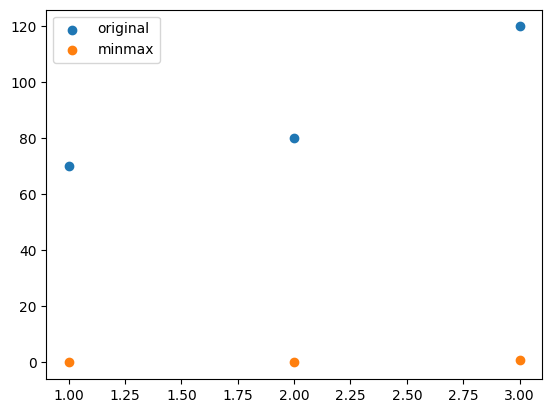

In [7]:
#===================== Normalization MinMax ====================

X= np.array([[70],
             [80],
             [120]])

scaler= MinMaxScaler()
minmax= scaler.fit_transform(X)

plt.scatter(np.array([1,2,3]), X, label='original')
plt.scatter(np.array([1,2,3]), minmax, label='minmax')
plt.legend()
plt.show()

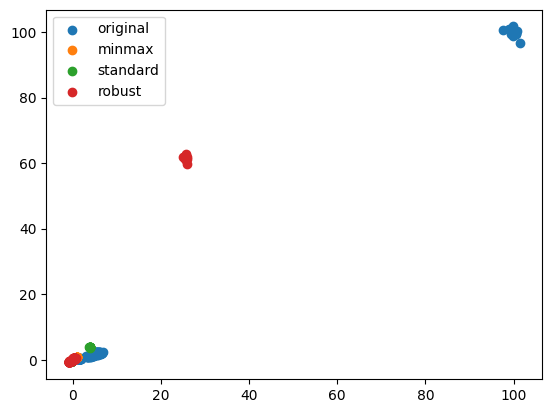

In [12]:
#===================== Normalization StandardScaler ====================

iris= load_iris()
X=iris.data

outliers= np.full((10, 4), 100)+np.random.randn(10, 4)
X= np.vstack((X, outliers))

scaler= MinMaxScaler()
minmax= scaler.fit_transform(X)
scaler1= StandardScaler()
X_std= scaler1.fit_transform(X)
scaler2= RobustScaler()
X_rob= scaler2.fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label='original')
plt.scatter(minmax[:, 2], minmax[:, 3], label='minmax')
plt.scatter(X_std[:, 2], X_std[:, 3], label='standard')
plt.scatter(X_rob[:, 2], X_rob[:, 3], label='robust')
plt.legend()
plt.show()

In [13]:
#============= Discretisation ========================

from sklearn.preprocessing import Binarizer

In [15]:
X= np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [20]:
X_transf = Binarizer(threshold=3).fit_transform(X)   #si >3 = 1, sinon =0
np.hstack((X, X_transf))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [21]:
#================= Pipeline ==============================
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
model= make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     SGDClassifier(random_state=0))

params= {
    'polynomialfeatures__degree': [2,3,4],
    'sgdclassifier__penalty' : ['11', '12']
}

grid= GridSearchCV(model, param_grid= params, cv=4)
grid.fit(X_train, y_train)
grid.predict(X_test)

In [1]:
#============= advanced pipeline =======================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import seaborn as sns

In [2]:
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
model= make_pipeline(StandardScaler(), SGDClassifier())
model.fit_transform(titanic)   #error cuz we have a data set with no numeric columns

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

In [9]:
#=========== Apply 1 transformer on many columns ===================
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

transformer= make_column_transformer((StandardScaler(),
                                     ['age', 'fare']))

titanic.dropna(axis=0, inplace=True)
X= titanic.drop('survived', axis=1)
y= titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model= make_pipeline(transformer, SGDClassifier())
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7027027027027027

In [7]:
#================ Apply many transformers on many columns ===============
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector

#numerical_columns= ['pclass', 'age', 'fare']
numerical_columns= make_column_selector(dtype_include=np.number)
#categoriel_features= ['sex', 'deck', 'alone']
categoriel_features= make_column_selector(dtype_exclude=np.number)

transformer1= make_pipeline(SimpleImputer(), StandardScaler())
transformer2= make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder())

transformer= make_column_transformer((transformer1, numerical_columns ),
                                     (transformer2, categoriel_features))

model= make_pipeline(transformer, SGDClassifier())
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [6]:
#================ transformers in parallel ====================

from sklearn.pipeline import make_union
from sklearn.preprocessing import Binarizer

print(titanic['pclass'].dtype)
numerical_columns= titanic[['pclass', 'age', 'fare']]
transformer = make_union(StandardScaler(), Binarizer())   # the default threshold is 0
transformer.fit_transform(numerical_columns)

In [3]:
#================ Data cleaning ================================
from sklearn.impute import SimpleImputer
import numpy as np

X= np.array([[10, 3],
             [0, 4],
             [5,3],
             [np.nan, 3]])

imputer= SimpleImputer(missing_values= np.nan,
                       strategy='mean')

print(imputer.fit_transform(X))

X_test= np.array([[np.nan, np.nan],    # always those values will be replaced with [5, 3.25]
             [np.nan, np.nan],
             [np.nan,np.nan],
             [np.nan, np.nan]])

print(imputer.transform(X_test))

[[10.  3.]
 [ 0.  4.]
 [ 5.  3.]
 [ 5.  3.]]
[[5.   3.25]
 [5.   3.25]
 [5.   3.25]
 [5.   3.25]]


In [12]:
from sklearn.impute import KNNImputer

X= np.array([[10, 3],
             [0, 4],
             [5,3],
             [np.nan, 3]])

imputer= KNNImputer(n_neighbors=1)
imputer.fit_transform(X)


array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [10.,  3.]])

In [13]:
#============= Missing indicator =================
from sklearn.impute import MissingIndicator

pipeline= make_union(SimpleImputer(strategy='constant', fill_value=-99),
                     MissingIndicator())

pipeline.fit_transform(X)

array([[ 10.,   3.,   0.],
       [  0.,   4.,   0.],
       [  5.,   3.,   0.],
       [-99.,   3.,   1.]])

In [1]:
#=================== Data mining : features selector ====================

from sklearn.feature_selection import VarianceThreshold

In [9]:
from sklearn.datasets import load_iris

iris= load_iris()
X= iris.data   # 4 features
y= iris.target  # 1 feautures
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# we want to remove the features which have the variance less than 0.2

X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [11]:
transformer= VarianceThreshold(threshold=0.2)
transformer.fit_transform(X)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [18]:
import numpy as np

np.array(iris.feature_names)[transformer.get_support()]


array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [19]:
#============== delete the features which not have the hight dependency with label =================

from sklearn.feature_selection import SelectKBest, chi2

chi2(X,y)  # first array shows the dependency degree between each feature of X and label y


(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [20]:
transformer= SelectKBest(chi2, k=1)  # k=1 means select only the feature which has the hightest degree of dependency
transformer.fit_transform(X, y)

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [22]:
transformer= SelectKBest(chi2, k=2)  # k=2 means select only the 2 features which have the hightest degree of dependency
transformer.fit_transform(X, y)
transformer.get_support()

array([False, False,  True,  True])

In [2]:
#================== SelectFromModel ======================

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

transformer = SelectFromModel(SGDClassifier(random_state=0),
                              threshold= 'mean')

transformer.fit_transform(X ,y)
transformer.get_support()


In [31]:
transformer.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [1]:
#=========== RFE =========================
from sklearn.feature_selection import RFE, RFECV


In [3]:
transformer= RFECV(SGDClassifier(random_state=0),
                   step=1,
                   min_features_to_select=2,
                   cv=5)

transformer.fit(X,y)
transformer.ranking_

NameError: name 'X' is not defined